In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

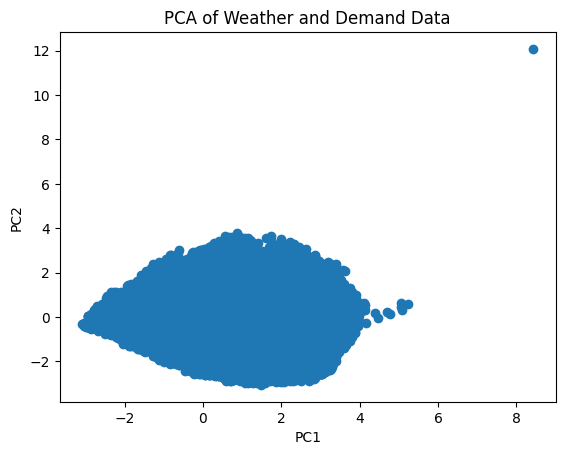

In [2]:
#Load data
df=pd.read_csv('scaleddataset.csv')

#Preprocess data (standardize if necessary)
features=df[['temperature','humidity','windSpeed','demand']] 

#PCA for dimensionality reduction (2D visualization)
pca=PCA(n_components=2)
pcacomponents=pca.fit_transform(features)

#Visualize the data
plt.scatter(pcacomponents[:,0],pcacomponents[:,1])
plt.title('PCA of Weather and Demand Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


c:\Users\riyya\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\riyya\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\riyya\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 546, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\riyya\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1022, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

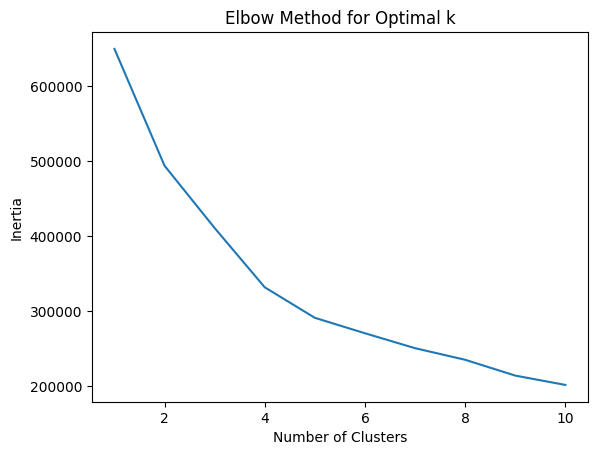

In [3]:
#K-Means clustering with elbow method to determine k
inertia=[]
for k in range(1, 11):
    kmeans =KMeans(n_clusters=k)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

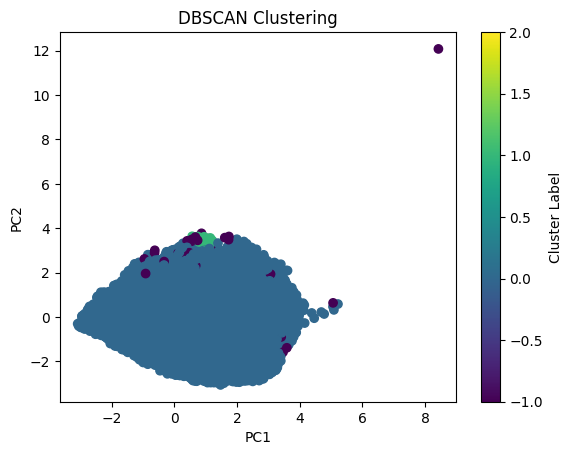

In [4]:
#DBSCAN clustering
dbscan=DBSCAN(eps=0.5,min_samples=5)
dbscan_labels=dbscan.fit_predict(features)

#Visualize DBSCAN results in 2D space
plt.scatter(pcacomponents[:,0],pcacomponents[:,1],c=dbscan_labels,cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster Label')
plt.show()

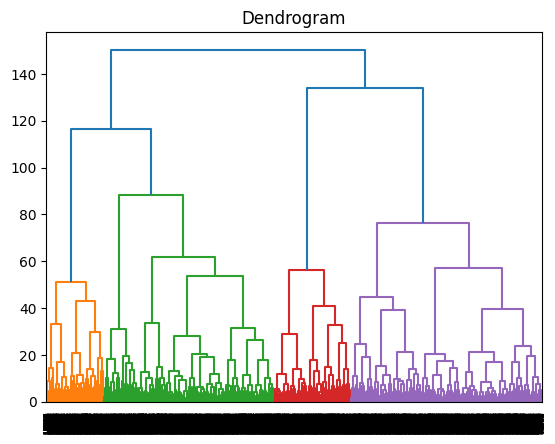

In [5]:
dfsampled=df.sample(frac=0.1,random_state=42)
sampledfeatures=dfsampled[['temperature','humidity','windSpeed','demand']]  
#Perform hierarchical clustering on the sampled data
Z=linkage(sampledfeatures,'ward')
dendrogram(Z)
plt.title('Dendrogram')
plt.show()

In [6]:
kmeans=KMeans(n_clusters=3)
kmeanslabels=kmeans.fit_predict(features)

#Evaluate silhouette score for K-Means
silscorekmeans=silhouette_score(features,kmeanslabels)
print(f'Silhouette Score for K-Means: {silscorekmeans}')

#Interpret the clusters (based on mean values)
clustercenters=pd.DataFrame(kmeans.cluster_centers_,columns=features.columns)
print("Cluster Centers (K-Means):")
print(clustercenters)

#Additional interpretation of the clusters (characterizing based on weather and demand)
for clusternum,center in enumerate(clustercenters.values):
    print(f"\nCluster {clusternum}:")
    temp,humidity,wind,demand = center
    
    if demand>=0.8:
        if temp>=0.5:
            print(f"Characterized as: 'High-demand hot period' (Demand: {demand:.2f},Temp: {temp:.2f})")
        else:
            print(f"Characterized as: 'High-demand moderate-temp period' (Demand: {demand:.2f},Temp: {temp:.2f})")
    
    elif demand<=-0.7:
        if temp<=-0.5:
            print(f"Characterized as: 'Low-demand cool period' (Demand: {demand:.2f},Temp: {temp:.2f})")
        else:
            print(f"Characterized as: 'Low-demand moderate-temp period' (Demand: {demand:.2f},Temp: {temp:.2f})")
    
    else:
        #Adjusted humidity threshold to -0.7 for better dry-period detection
        if temp>0.7 and humidity<-0.7:
            print(f"Characterized as: 'Average-demand dry hot spell' (Demand: {demand:.2f},Temp: {temp:.2f},Humidity: {humidity:.2f})")
        else:
            print(f"Characterized as: 'Moderate-demand period' (Demand: {demand:.2f},Temp: {temp:.2f})")




Silhouette Score for K-Means: 0.23368342765757
Cluster Centers (K-Means):
   temperature  humidity  windSpeed    demand
0     0.843290 -1.229965   0.232782 -0.033043
1    -0.676902  0.395561  -0.084574 -0.818258
2     0.122586  0.489802  -0.081668  0.950507

Cluster 0:
Characterized as: 'Average-demand dry hot spell' (Demand: -0.03,Temp: 0.84,Humidity: -1.23)

Cluster 1:
Characterized as: 'Low-demand cool period' (Demand: -0.82,Temp: -0.68)

Cluster 2:
Characterized as: 'High-demand moderate-temp period' (Demand: 0.95,Temp: 0.12)
